In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [74]:
new_homes_tn_by_co = pd.read_excel('Datasets/New-Home-Sales-2012-2023.xlsx', header=1)
new_homes_tn_by_co.head()

,,2012,2013,2014,2015,2016,2017*,2018*,2019,2020,...,2014.1,2015.1,2016.1,2017*.1,2018*.1,2019.1,2020.1,2021.1,2022.1,2023.1
0,Column1,Column2,Column3,Column32,Column33,Column6,Column7,Column8,Column62,Column622,...,Column15,Column142,Column17,Column18,Column19,Column172,Column1722,Column17222,Column172222,Column1722222
1,Tennessee,8185,9615,8961,12332,14728,"17,328*","17,440*",18754,5933,...,256200,264500,274900,"$289,000*","$307,657*",309990,329500,349431,408000,420000
2,NaN,NaN,NaN,NaN,NaN,NaN,Number of Homes Sold,NaN,NaN,NaN,...,NaN,NaN,NaN,Median Sales Price,NaN,NaN,NaN,NaN,NaN,NaN
3,Anderson,3,25,22,26,34,40,47,56,15,...,172900,174900,209250,200531,221500,237450,239900,276480,320335,357450
4,Bedford,12,11,36,51,73,124,137,174,33,...,122200,138200,147000,179900,191900,215063,232000,250925,332477,314995


In [75]:
exist_homes_tn_by_co = pd.read_excel('Datasets/Existing-Home-Sales-2012-2023.xlsx', header=1)
exist_homes_tn_by_co.head()

,Unnamed: 0,2012,2013,2014,2015,2016,2017*,2018*,2019,2020,...,2014.1,2015.1,2016.1,2017*.1,2018*.1,2019.1,2020.1,2021.1,2022.1,2023.1
0,Column1,Column11,Column112,Column2,Column3,Column5,Column6,Column7,Column52,Column522,...,Column14,Column4,Column17,Column18,Column19,Column172,Column1722,Column17222,Column172222,Column1722222
1,Tennessee,46425,56940,64366,75685,82382,"88,201*","90,704*",92672,114454,...,156500,162600,171250,"$179,900*","$190,000*",209900,239900,265000,300000,310500
2,,NaN,NaN,NaN,NaN,NaN,Number of Homes Sold,NaN,NaN,NaN,...,NaN,NaN,NaN,Median Sales Price,NaN,NaN,NaN,NaN,NaN,NaN
3,Anderson,569,624,654,798,890,937,1017,1025,1286,...,126500,128000,136750,134000,144900,159000,171450,200000,233000,260250
4,Bedford,281,376,459,556,652,645,681,649,864,...,114000,117500,127950,140000,151000,165000,199900,225000,270000,283200


### SOURCE FOR BOTH FILES FROM TDHA: http://thda.org/research-reports/tennessee-housing-market/tennessee-home-sales-data

In [76]:
new_homes_tn_by_co = new_homes_tn_by_co.drop(index=[0,1,2])

In [77]:
exist_homes_tn_by_co = exist_homes_tn_by_co.drop(index=[0,1,2])

In [78]:
new_homes_tn_by_co.fillna(0)

,,2012,2013,2014,2015,2016,2017*,2018*,2019,2020,...,2014.1,2015.1,2016.1,2017*.1,2018*.1,2019.1,2020.1,2021.1,2022.1,2023.1
3,Anderson,3,25,22,26,34,40,47,56,15,...,172900.0,174900,209250,200531,221500,237450,239900,276480.0,320335.0,357450.0
4,Bedford,12,11,36,51,73,124,137,174,33,...,122200.0,138200,147000,179900,191900,215063,232000,250925.0,332477.0,314995.0
5,Benton,1,0,3,0,1,2,3,1,1,...,191000.0,0,110000,61500,140000,143500,129900,187000.0,146200.0,167500.0
6,Bledsoe,1,0,1,0,0,0,3,2,1,...,129800.0,0,0,0,142000,157700,152000,227450.0,294000.0,265000.0
7,Blount,114,185,166,194,243,323,376,429,101,...,214950.0,219900,222600,232300,252423,264095,289900,308935.0,400000.0,479900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,*A number of methodological improvements have ...,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0,0.0
101,These improvements reflect the inclusion of a)...,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0,0.0
102,"also scattered across the state, and c) additi...",0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0,0.0
103,These additional transactions increased the sa...,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0,0.0


In [79]:
exist_homes_tn_by_co.fillna(0)

,Unnamed: 0,2012,2013,2014,2015,2016,2017*,2018*,2019,2020,...,2014.1,2015.1,2016.1,2017*.1,2018*.1,2019.1,2020.1,2021.1,2022.1,2023.1
3,Anderson,569,624,654,798,890,937,1017,1025,1286,...,126500,128000,136750,134000,144900,159000,171450,200000,233000.0,260250
4,Bedford,281,376,459,556,652,645,681,649,864,...,114000,117500,127950,140000,151000,165000,199900,225000,270000.0,283200
5,Benton,98,137,123,139,138,158,177,147,195,...,75000,75000,90000,84950,80000,95500,120500,139900,139500.0,143750
6,Bledsoe,30,45,40,55,63,52,61,64,82,...,92500,105900,96000,105500,134500,138000,127500,164750,184500.0,173200
7,Blount,858,1113,1241,1477,1646,1961,1999,1962,2506,...,160000,166000,170500,179900,190000,205000,239543,273000,320000.0,353000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,*A number of methodological improvements have ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0
102,These improvements reflect the inclusion of a)...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0
103,"also scattered across the state, and c) additi...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0
104,These additional transactions increased the sa...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0


In [80]:
new_homes_tn_by_co.rename(columns={new_homes_tn_by_co.columns[0]:'COUNTY'}, inplace=True)
new_homes_tn_by_co.columns

Index([     'COUNTY',          2012,          2013,          2014,
                2015,          2016,       '2017*',       '2018*',
                2019,          2020,          2021,          2022,
                2023, 'Unnamed: 13',      '2012.1',      '2013.1',
            '2014.1',      '2015.1',      '2016.1',     '2017*.1',
           '2018*.1',      '2019.1',      '2020.1',      '2021.1',
            '2022.1',      '2023.1'],
      dtype='object')

In [81]:
exist_homes_tn_by_co.rename(columns={'Unnamed: 0':'COUNTY'}, inplace=True)
exist_homes_tn_by_co.columns

Index([     'COUNTY',          2012,          2013,          2014,
                2015,          2016,       '2017*',       '2018*',
                2019,          2020,          2021,          2022,
                2023, 'Unnamed: 13',      '2012.1',      '2013.1',
            '2014.1',      '2015.1',      '2016.1',     '2017*.1',
           '2018*.1',      '2019.1',      '2020.1',      '2021.1',
            '2022.1',      '2023.1'],
      dtype='object')

In [82]:
new_homes_tn_by_co.columns = new_homes_tn_by_co.columns.map(lambda x: str(x).strip().replace('*', '').replace('.1', ''))

exist_homes_tn_by_co.columns = exist_homes_tn_by_co.columns.map(lambda x: str(x).strip().replace('*', '').replace('.1', ''))

In [83]:
year_cols = [col for col in new_homes_tn_by_co.columns if str(col).startswith('2')]
year_cols

['2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023']

In [84]:
new_homes_columns = {col: str(col) + '_NEW_HOMES' for col in year_cols}
existing_homes_columns = {col: str(col) + '_EXISTING_HOMES' for col in year_cols}

new_homes_tn_by_co = new_homes_tn_by_co.rename(columns=new_homes_columns)
exist_homes_tn_by_co = exist_homes_tn_by_co.rename(columns=existing_homes_columns)

In [85]:
exist_homes_tn_by_co

,COUNTY,2012_EXISTING_HOMES,2013_EXISTING_HOMES,2014_EXISTING_HOMES,2015_EXISTING_HOMES,2016_EXISTING_HOMES,2017_EXISTING_HOMES,2018_EXISTING_HOMES,2019_EXISTING_HOMES,2020_EXISTING_HOMES,...,2014_EXISTING_HOMES,2015_EXISTING_HOMES,2016_EXISTING_HOMES,2017_EXISTING_HOMES,2018_EXISTING_HOMES,2019_EXISTING_HOMES,2020_EXISTING_HOMES,2021_EXISTING_HOMES,2022_EXISTING_HOMES,2023_EXISTING_HOMES
3,Anderson,569,624,654,798,890,937,1017,1025,1286,...,126500,128000,136750,134000,144900,159000,171450,200000,233000,260250
4,Bedford,281,376,459,556,652,645,681,649,864,...,114000,117500,127950,140000,151000,165000,199900,225000,270000,283200
5,Benton,98,137,123,139,138,158,177,147,195,...,75000,75000,90000,84950,80000,95500,120500,139900,139500,143750
6,Bledsoe,30,45,40,55,63,52,61,64,82,...,92500,105900,96000,105500,134500,138000,127500,164750,184500,173200
7,Blount,858,1113,1241,1477,1646,1961,1999,1962,2506,...,160000,166000,170500,179900,190000,205000,239543,273000,320000,353000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,*A number of methodological improvements have ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,These improvements reflect the inclusion of a)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,"also scattered across the state, and c) additi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,These additional transactions increased the sa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
new_homes_tn_by_co

,COUNTY,2012_NEW_HOMES,2013_NEW_HOMES,2014_NEW_HOMES,2015_NEW_HOMES,2016_NEW_HOMES,2017_NEW_HOMES,2018_NEW_HOMES,2019_NEW_HOMES,2020_NEW_HOMES,...,2014_NEW_HOMES,2015_NEW_HOMES,2016_NEW_HOMES,2017_NEW_HOMES,2018_NEW_HOMES,2019_NEW_HOMES,2020_NEW_HOMES,2021_NEW_HOMES,2022_NEW_HOMES,2023_NEW_HOMES
3,Anderson,3,25,22,26,34,40,47,56,15,...,172900,174900,209250,200531,221500,237450,239900,276480,320335,357450
4,Bedford,12,11,36,51,73,124,137,174,33,...,122200,138200,147000,179900,191900,215063,232000,250925,332477,314995
5,Benton,1,0,3,0,1,2,3,1,1,...,191000,NaN,110000,61500,140000,143500,129900,187000,146200,167500
6,Bledsoe,1,0,1,0,0,0,3,2,1,...,129800,NaN,NaN,NaN,142000,157700,152000,227450,294000,265000
7,Blount,114,185,166,194,243,323,376,429,101,...,214950,219900,222600,232300,252423,264095,289900,308935,400000,479900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,*A number of methodological improvements have ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,These improvements reflect the inclusion of a)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,"also scattered across the state, and c) additi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,These additional transactions increased the sa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
building_permits = pd.read_csv('Datasets/Cleaned_TN_Building_Permits_Census.csv')
building_permits.sort_values(by='NAME', inplace=True)
building_permits

,OBJECTID,GEOID,STATE,COUNTY,NAME,STUSAB,STATE_NAME,ALL_PERMITS_1980,ALL_PERMITS_1981,ALL_PERMITS_1982,...,ALL_PERMITS_2013,ALL_PERMITS_2014,ALL_PERMITS_2015,ALL_PERMITS_2016,ALL_PERMITS_2017,ALL_PERMITS_2018,ALL_PERMITS_2019,ALL_PERMITS_2020,ALL_PERMITS_2021,ALL_PERMITS_2022
62,2037,47001,47,1,Anderson,TN,Tennessee,583.0,331.0,493.0,...,103.0,173.0,120.0,128.0,141.0,198.0,164.0,436.0,458,396.0
76,2194,47003,47,3,Bedford,TN,Tennessee,15.0,43.0,14.0,...,74.0,171.0,161.0,191.0,237.0,258.0,313.0,335.0,390,458.0
45,1399,47005,47,5,Benton,TN,Tennessee,7.0,10.0,6.0,...,5.0,0.0,3.0,10.0,23.0,15.0,16.0,18.0,4,11.0
60,1960,47007,47,7,Bledsoe,TN,Tennessee,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
6,256,47009,47,9,Blount,TN,Tennessee,200.0,119.0,88.0,...,370.0,608.0,631.0,744.0,887.0,868.0,893.0,907.0,922,852.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,1304,47181,47,181,Wayne,TN,Tennessee,4.0,3.0,2.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0.0
32,1084,47183,47,183,Weakley,TN,Tennessee,69.0,29.0,53.0,...,53.0,33.0,23.0,37.0,41.0,55.0,48.0,61.0,64,63.0
9,283,47185,47,185,White,TN,Tennessee,8.0,56.0,41.0,...,88.0,85.0,87.0,103.0,114.0,138.0,158.0,159.0,192,195.0
67,2111,47187,47,187,Williamson,TN,Tennessee,538.0,324.0,514.0,...,1386.0,1902.0,2304.0,2759.0,2859.0,2121.0,2467.0,2284.0,2980,2254.0


In [88]:
building_permits['COUNTY'] = building_permits['COUNTY'].astype(str)
building_permits.rename(columns={"COUNTY":"COUNTY_CODE"}, inplace=True)
building_permits.rename(columns={"NAME":"COUNTY"}, inplace=True)
building_permits

,OBJECTID,GEOID,STATE,COUNTY_CODE,COUNTY,STUSAB,STATE_NAME,ALL_PERMITS_1980,ALL_PERMITS_1981,ALL_PERMITS_1982,...,ALL_PERMITS_2013,ALL_PERMITS_2014,ALL_PERMITS_2015,ALL_PERMITS_2016,ALL_PERMITS_2017,ALL_PERMITS_2018,ALL_PERMITS_2019,ALL_PERMITS_2020,ALL_PERMITS_2021,ALL_PERMITS_2022
62,2037,47001,47,1,Anderson,TN,Tennessee,583.0,331.0,493.0,...,103.0,173.0,120.0,128.0,141.0,198.0,164.0,436.0,458,396.0
76,2194,47003,47,3,Bedford,TN,Tennessee,15.0,43.0,14.0,...,74.0,171.0,161.0,191.0,237.0,258.0,313.0,335.0,390,458.0
45,1399,47005,47,5,Benton,TN,Tennessee,7.0,10.0,6.0,...,5.0,0.0,3.0,10.0,23.0,15.0,16.0,18.0,4,11.0
60,1960,47007,47,7,Bledsoe,TN,Tennessee,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
6,256,47009,47,9,Blount,TN,Tennessee,200.0,119.0,88.0,...,370.0,608.0,631.0,744.0,887.0,868.0,893.0,907.0,922,852.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,1304,47181,47,181,Wayne,TN,Tennessee,4.0,3.0,2.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0.0
32,1084,47183,47,183,Weakley,TN,Tennessee,69.0,29.0,53.0,...,53.0,33.0,23.0,37.0,41.0,55.0,48.0,61.0,64,63.0
9,283,47185,47,185,White,TN,Tennessee,8.0,56.0,41.0,...,88.0,85.0,87.0,103.0,114.0,138.0,158.0,159.0,192,195.0
67,2111,47187,47,187,Williamson,TN,Tennessee,538.0,324.0,514.0,...,1386.0,1902.0,2304.0,2759.0,2859.0,2121.0,2467.0,2284.0,2980,2254.0


In [89]:
permit_cols_to_drop = [col for col in building_permits.columns if col.startswith("ALL_PERMITS_") and int(col.split("_")[-1]) < 2012]
building_permits.drop(columns=permit_cols_to_drop, inplace=True)
building_permits

,OBJECTID,GEOID,STATE,COUNTY_CODE,COUNTY,STUSAB,STATE_NAME,ALL_PERMITS_2012,ALL_PERMITS_2013,ALL_PERMITS_2014,ALL_PERMITS_2015,ALL_PERMITS_2016,ALL_PERMITS_2017,ALL_PERMITS_2018,ALL_PERMITS_2019,ALL_PERMITS_2020,ALL_PERMITS_2021,ALL_PERMITS_2022
62,2037,47001,47,1,Anderson,TN,Tennessee,70.0,103.0,173.0,120.0,128.0,141.0,198.0,164.0,436.0,458,396.0
76,2194,47003,47,3,Bedford,TN,Tennessee,66.0,74.0,171.0,161.0,191.0,237.0,258.0,313.0,335.0,390,458.0
45,1399,47005,47,5,Benton,TN,Tennessee,2.0,5.0,0.0,3.0,10.0,23.0,15.0,16.0,18.0,4,11.0
60,1960,47007,47,7,Bledsoe,TN,Tennessee,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
6,256,47009,47,9,Blount,TN,Tennessee,335.0,370.0,608.0,631.0,744.0,887.0,868.0,893.0,907.0,922,852.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,1304,47181,47,181,Wayne,TN,Tennessee,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0.0
32,1084,47183,47,183,Weakley,TN,Tennessee,36.0,53.0,33.0,23.0,37.0,41.0,55.0,48.0,61.0,64,63.0
9,283,47185,47,185,White,TN,Tennessee,5.0,88.0,85.0,87.0,103.0,114.0,138.0,158.0,159.0,192,195.0
67,2111,47187,47,187,Williamson,TN,Tennessee,1532.0,1386.0,1902.0,2304.0,2759.0,2859.0,2121.0,2467.0,2284.0,2980,2254.0


In [90]:
merged_home_sales = new_homes_tn_by_co.merge(exist_homes_tn_by_co, on='COUNTY')
merged_df = merged_home_sales.merge(building_permits, on='COUNTY')
merged_df

,COUNTY,2012_NEW_HOMES,2013_NEW_HOMES,2014_NEW_HOMES,2015_NEW_HOMES,2016_NEW_HOMES,2017_NEW_HOMES,2018_NEW_HOMES,2019_NEW_HOMES,2020_NEW_HOMES,...,ALL_PERMITS_2013,ALL_PERMITS_2014,ALL_PERMITS_2015,ALL_PERMITS_2016,ALL_PERMITS_2017,ALL_PERMITS_2018,ALL_PERMITS_2019,ALL_PERMITS_2020,ALL_PERMITS_2021,ALL_PERMITS_2022
0,Anderson,3,25,22,26,34,40,47,56,15,...,103.0,173.0,120.0,128.0,141.0,198.0,164.0,436.0,458,396.0
1,Bedford,12,11,36,51,73,124,137,174,33,...,74.0,171.0,161.0,191.0,237.0,258.0,313.0,335.0,390,458.0
2,Benton,1,0,3,0,1,2,3,1,1,...,5.0,0.0,3.0,10.0,23.0,15.0,16.0,18.0,4,11.0
3,Bledsoe,1,0,1,0,0,0,3,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,Blount,114,185,166,194,243,323,376,429,101,...,370.0,608.0,631.0,744.0,887.0,868.0,893.0,907.0,922,852.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Wayne,0,0,0,1,0,0,0,1,NaN,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0.0
91,Weakley,8,12,10,10,6,7,3,6,5,...,53.0,33.0,23.0,37.0,41.0,55.0,48.0,61.0,64,63.0
92,White,27,27,14,10,14,24,38,24,15,...,88.0,85.0,87.0,103.0,114.0,138.0,158.0,159.0,192,195.0
93,Williamson,1115,1440,1497,1720,1784,1794,1956,1604,588,...,1386.0,1902.0,2304.0,2759.0,2859.0,2121.0,2467.0,2284.0,2980,2254.0


In [91]:
new_cols = [col for col in merged_df.columns if '_NEW_HOMES' in col]
exist_cols = [col for col in merged_df.columns if '_EXIST_HOMES' in col]


In [92]:
cols_to_drop = [col for col in merged_df.columns if 'Unnamed' in col or 'OBJECTID' in col or 'GEOID' in col or 'STUSAB' in col or 'STATE_NAME' in col or 'COUNTY_CODE' in col]
merged_df.drop(columns=cols_to_drop, inplace=True)
merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]
merged_df.columns

Index(['COUNTY', '2012_NEW_HOMES', '2013_NEW_HOMES', '2014_NEW_HOMES',
       '2015_NEW_HOMES', '2016_NEW_HOMES', '2017_NEW_HOMES', '2018_NEW_HOMES',
       '2019_NEW_HOMES', '2020_NEW_HOMES', '2021_NEW_HOMES', '2022_NEW_HOMES',
       '2023_NEW_HOMES', '2012_EXISTING_HOMES', '2013_EXISTING_HOMES',
       '2014_EXISTING_HOMES', '2015_EXISTING_HOMES', '2016_EXISTING_HOMES',
       '2017_EXISTING_HOMES', '2018_EXISTING_HOMES', '2019_EXISTING_HOMES',
       '2020_EXISTING_HOMES', '2021_EXISTING_HOMES', '2022_EXISTING_HOMES',
       '2023_EXISTING_HOMES', 'STATE', 'ALL_PERMITS_2012', 'ALL_PERMITS_2013',
       'ALL_PERMITS_2014', 'ALL_PERMITS_2015', 'ALL_PERMITS_2016',
       'ALL_PERMITS_2017', 'ALL_PERMITS_2018', 'ALL_PERMITS_2019',
       'ALL_PERMITS_2020', 'ALL_PERMITS_2021', 'ALL_PERMITS_2022'],
      dtype='object')

In [93]:
new_cols = [col for col in merged_df.columns if '_NEW_HOMES' in col]
exist_cols = [col for col in merged_df.columns if '_EXISTING_HOMES' in col]

In [94]:
new_homes_melted = merged_df.melt(
    id_vars=['COUNTY'],
    value_vars=new_cols,
    var_name='year_column_name',
    value_name='new_home_sales'
)
new_homes_melted['year'] = new_homes_melted['year_column_name'].str.extract(r'(\d{4})').astype(int)
new_homes_melted

,COUNTY,year_column_name,new_home_sales,year
0,Anderson,2012_NEW_HOMES,3,2012
1,Bedford,2012_NEW_HOMES,12,2012
2,Benton,2012_NEW_HOMES,1,2012
3,Bledsoe,2012_NEW_HOMES,1,2012
4,Blount,2012_NEW_HOMES,114,2012
...,...,...,...,...
1135,Wayne,2023_NEW_HOMES,2,2023
1136,Weakley,2023_NEW_HOMES,15,2023
1137,White,2023_NEW_HOMES,85,2023
1138,Williamson,2023_NEW_HOMES,1277,2023


In [95]:
exist_homes_melted = merged_df.melt(
    id_vars=['COUNTY'],
    value_vars=exist_cols,
    var_name='year_column_name',
    value_name='existing_home_sales'
)
exist_homes_melted['year'] = new_homes_melted['year_column_name'].str.extract(r'(\d{4})').astype(int)
exist_homes_melted

,COUNTY,year_column_name,existing_home_sales,year
0,Anderson,2012_EXISTING_HOMES,569,2012
1,Bedford,2012_EXISTING_HOMES,281,2012
2,Benton,2012_EXISTING_HOMES,98,2012
3,Bledsoe,2012_EXISTING_HOMES,30,2012
4,Blount,2012_EXISTING_HOMES,858,2012
...,...,...,...,...
1135,Wayne,2023_EXISTING_HOMES,92,2023
1136,Weakley,2023_EXISTING_HOMES,255,2023
1137,White,2023_EXISTING_HOMES,289,2023
1138,Williamson,2023_EXISTING_HOMES,2937,2023


In [96]:
format_home_sales = sales_df = pd.merge(new_homes_melted, exist_homes_melted, on=['COUNTY', 'year'])

# Check This Work VVVVV

In [97]:
permit_cols = [col for col in merged_df.columns if 'ALL_PERMITS_' in col]
recent_permit_cols = [col for col in permit_cols if int(col.split('_')[-1]) >= 2012]

In [98]:
merged_df['permits_avg_last_3'] = merged_df[['ALL_PERMITS_2020', 'ALL_PERMITS_2021', 'ALL_PERMITS_2022']].mean(axis=1)

/var/folders/d4/qjb5hv111ss95ml6yvtll3s80000gn/T/ipykernel_8144/2988729701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['permits_avg_last_3'] = merged_df[['ALL_PERMITS_2020', 'ALL_PERMITS_2021', 'ALL_PERMITS_2022']].mean(axis=1)


In [99]:
merged_df['permits_change'] = merged_df['ALL_PERMITS_2022'] - merged_df['ALL_PERMITS_2012']

/var/folders/d4/qjb5hv111ss95ml6yvtll3s80000gn/T/ipykernel_8144/449778548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['permits_change'] = merged_df['ALL_PERMITS_2022'] - merged_df['ALL_PERMITS_2012']


In [100]:
merged_df['permits_growth_rate'] = (merged_df['ALL_PERMITS_2022'] - merged_df['ALL_PERMITS_2012']) / (2022 - 2012)


/var/folders/d4/qjb5hv111ss95ml6yvtll3s80000gn/T/ipykernel_8144/3141266173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['permits_growth_rate'] = (merged_df['ALL_PERMITS_2022'] - merged_df['ALL_PERMITS_2012']) / (2022 - 2012)


In [101]:
permit_features = merged_df[['COUNTY', 'permits_avg_last_3', 'permits_change', 'permits_growth_rate']]
final_df = pd.merge(sales_df, permit_features, on='COUNTY')

In [102]:
final_df.fillna(0, inplace=True)

In [103]:
final_df['new_home_sales'] = pd.to_numeric(final_df['new_home_sales'], errors='coerce')
final_df['existing_home_sales'] = pd.to_numeric(final_df['existing_home_sales'], errors='coerce')


In [104]:
final_df['new_to_existing_ratio'] = final_df['new_home_sales'] / (final_df['existing_home_sales'] + 1)


In [105]:
threshold = final_df['new_to_existing_ratio'].quantile(0.75)
final_df['likely_to_build'] = (final_df['new_to_existing_ratio'] > threshold).astype(int)

In [106]:
features = ['new_home_sales', 'existing_home_sales', 'new_to_existing_ratio', 
            'permits_avg_last_3', 'permits_change', 'permits_growth_rate']
target = 'likely_to_build'

X = final_df[features]
y = final_df[target]

X = X.fillna(X.median())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       180
           1       1.00      0.98      0.99        48

    accuracy                           1.00       228
   macro avg       1.00      0.99      0.99       228
weighted avg       1.00      1.00      1.00       228



In [107]:
new_cols = [col for col in merged_df.columns if '_NEW_HOMES' in col]
exist_cols = [col for col in merged_df.columns if '_EXISTING_HOMES' in col]

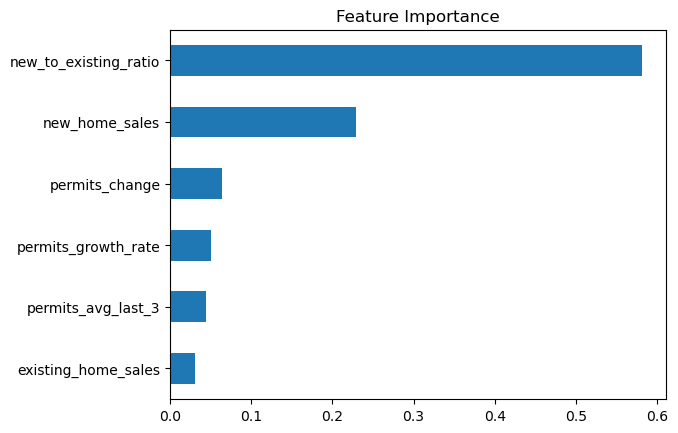

In [108]:
importances = model.feature_importances_
feat_importances = pd.Series(importances, index=features)
feat_importances.sort_values().plot(kind='barh', title='Feature Importance')
plt.show()

In [109]:
final_df['build_propensity_score'] = model.predict_proba(X)[:, 1]


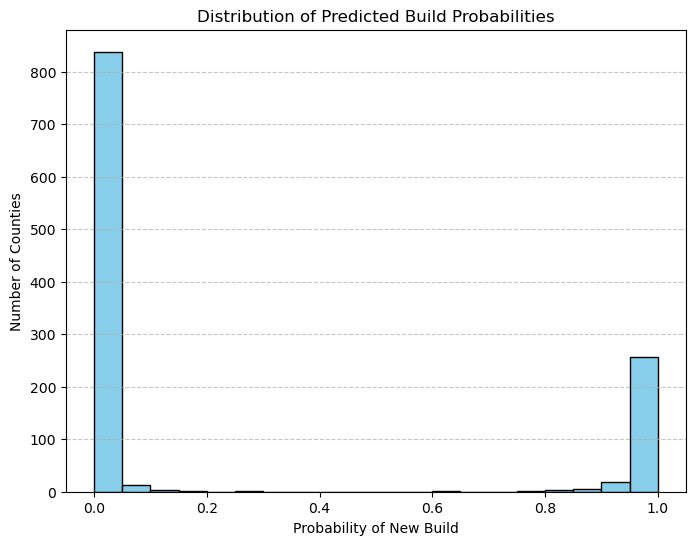

In [110]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(final_df['build_propensity_score'], bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Predicted Build Probabilities')
plt.xlabel('Probability of New Build')
plt.ylabel('Number of Counties')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


/var/folders/d4/qjb5hv111ss95ml6yvtll3s80000gn/T/ipykernel_8144/2615426614.py:29: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged_gdf['coords'] = merged_gdf['geometry'].centroid


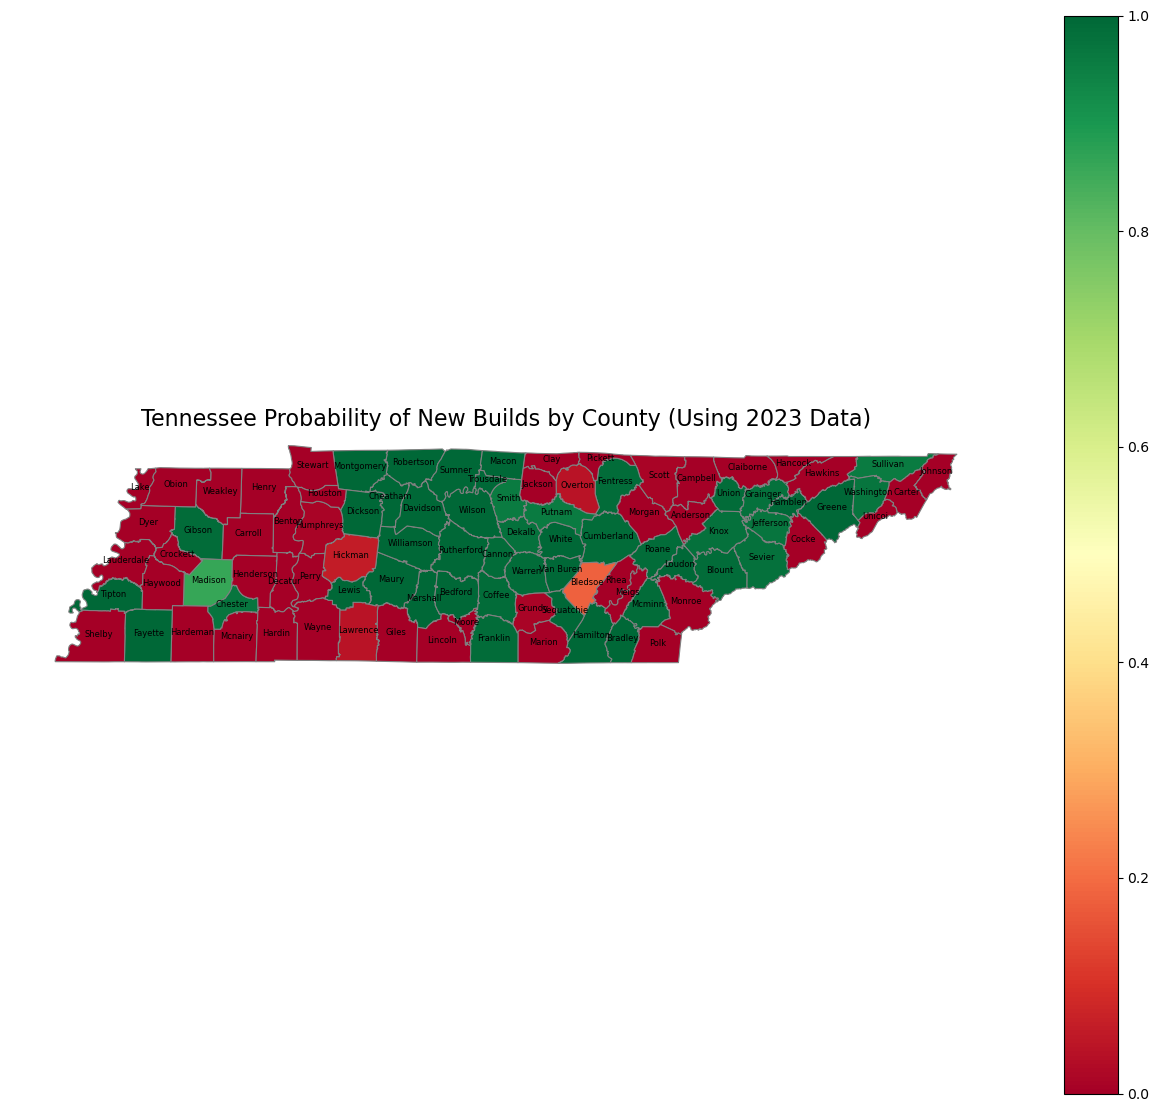

In [112]:
import geopandas as gpd
import matplotlib.pyplot as plt


final_df['build_propensity_score'] = model.predict_proba(X)[:, 1]


gdf = gpd.read_file("ShapeFiles/cb_2022_us_county_500k.shp")


gdf = gdf[gdf['STATEFP'] == '47']


gdf = gdf.to_crs(epsg=4326)


gdf.rename(columns={'NAME': 'COUNTY'}, inplace=True)
gdf['COUNTY'] = gdf['COUNTY'].str.title()
final_df['COUNTY'] = final_df['COUNTY'].str.title()


latest_year = final_df['year'].max()
map_df = final_df[final_df['year'] == latest_year][['COUNTY', 'build_propensity_score']].copy()


merged_gdf = gdf.merge(map_df, on='COUNTY', how='left')


merged_gdf['coords'] = merged_gdf['geometry'].centroid


fig, ax = plt.subplots(1, 1, figsize=(16, 14))
merged_gdf.plot(
    column='build_propensity_score',
    cmap='RdYlGn',
    linewidth=0.8,
    edgecolor='gray',
    legend=True,
    ax=ax
)


for idx, row in merged_gdf.iterrows():
    plt.annotate(
        text=row['COUNTY'],
        xy=(row['coords'].x, row['coords'].y),
        fontsize=6,
        ha='center',
        color='black'
    )

ax.set_title(f"Tennessee Probability of New Builds by County (Using {latest_year} Data)", fontsize=16)
ax.axis('off')
plt.show()



/var/folders/d4/qjb5hv111ss95ml6yvtll3s80000gn/T/ipykernel_8144/2312657024.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged_gdf['coords'] = merged_gdf['geometry'].centroid


You entered three counties: ['Bradley', 'Hamilton', 'Knox']


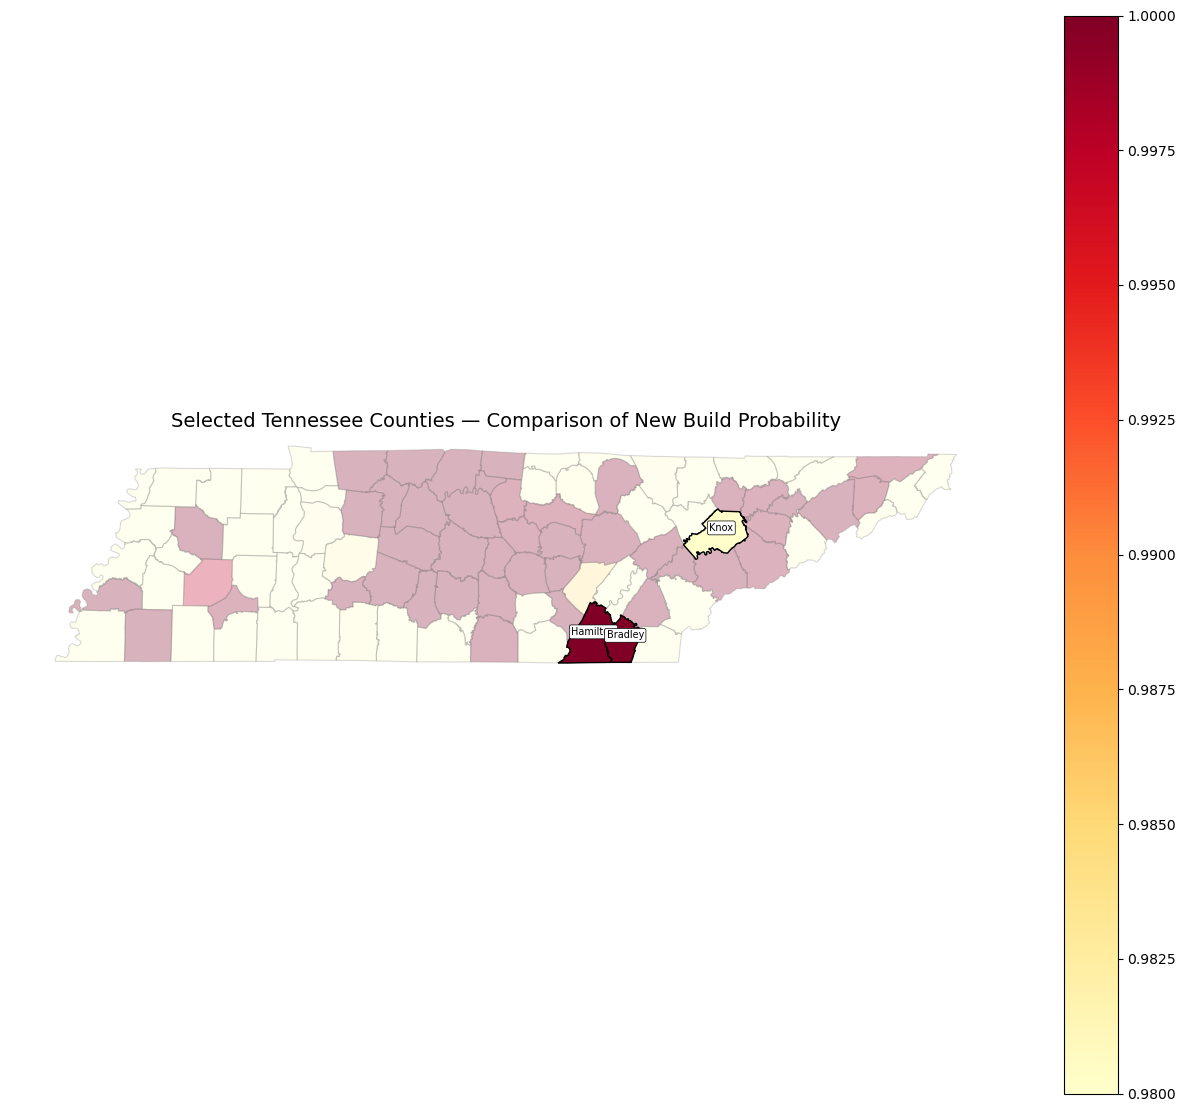

In [114]:
merged_gdf['coords'] = merged_gdf['geometry'].centroid

county_input = input("Enter three counties in Tennessee separated by commas (e.g., Hamilton, Knox, Bradley): ")

county_list = [c.strip().title() for c in county_input.split(",")]

print("You entered three counties:", county_list)

selected_gdf = merged_gdf[merged_gdf['COUNTY'].isin(county_list)]

fig, ax = plt.subplots(1, 1, figsize=(16, 14))
merged_gdf.plot(
    column='build_propensity_score',
    cmap='YlOrRd',
    linewidth=0.8,
    edgecolor='gray',
    legend=False,
    vmin=0,   
    vmax=1,
    ax=ax,
    alpha=0.3  
)

selected_gdf.plot(
    column='build_propensity_score',
    cmap='YlOrRd',
    linewidth=1,
    edgecolor='black',
    legend=True,
    ax=ax
)

for idx, row in selected_gdf.iterrows():
    plt.annotate(
        text=row['COUNTY'],
        xy=(row['coords'].x, row['coords'].y),
        xytext=(2, 2), 
        textcoords='offset points',
        fontsize=7,
        ha='center',
        color='black',
        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="black", lw=0.5)
    )

ax.set_title("Selected Tennessee Counties — Comparison of New Build Probability", fontsize=14)
ax.axis('off')
plt.show()
